# **Introduction au traitement d’image avec Python / OpenCV**

Ce tutoriel fournit une introduction aux techniques de traitement d'image de base à l'aide de la bibliothèque de vision par ordinateur OpenCV et de certaines bibliothèques d'analyse de données standard en Python. Une bonne introduction à Google Colab peut être trouvée [ici](https://colab.research.google.com/notebooks/welcome.ipynb) 
OpenCV est réalisée sous une licence BSD et est donc gratuit pour une utilisation académique et commerciale. Une bonne introduction à la bibliothèque OpenCV peut être trouvée [ici](https://opencv.org)

**Charger certaines dépendances requises**

* Numpy est une bibliothèque de manipulation de tableaux, utilisée pour l'algèbre linéaire et les capacités de nombres aléatoires
* Pandas est une bibliothèque pour la manipulation et l'analyse de données.
* CV2 est une bibliothèque pour les tâches de vision par ordinateur.
* Skimage est une bibliothèque qui supporte les applications de traitement d'images sur python.
* Matplotlib est une bibliothèque qui génère des chiffres et fournit une boîte à outils d'interface utilisateur graphique.

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from cv2 import imshow as cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [3]:
# récupérer les données en fichier zip et l'extraire ici

from zipfile import ZipFile
file_name = "./Data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


**Représentation d'image:**

Une image peut être représentée sous la forme d'un tableau multidimensionnel. En effet, une machine peut tout représenter sous forme de nombres et en python, numpy peut être utilisé pour le représenter.

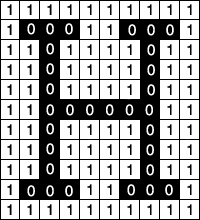

Dans le cas des images couleur, nous avons trois canaux colorés. Par conséquent, les images colorées auront plusieurs valeurs pour les valeurs d'un seul pixel. Selon la résolution et la profondeur de couleur, ces tableaux peuvent varier en taille. Les valeurs de couleur vont de 0 à 255. Ces canaux de couleur sont généralement représentés par Rouge Vert Bleu (RGB) par exemple.

In [4]:
# library imports 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

**Chargement des images avec OpenCV**
Le chargement d'images avec OpenCV est simple, mais il y a certaines choses que vous devez spécifier. OpenCV importera toutes les images (niveaux de gris ou couleur) avec 3 canaux, donc pour lire une image en niveaux de gris comme il n'y a qu'un seul canal, vous devez passer l'arg 0 après l'emplacement de l'image. Les formats d'image suivants peuvent être lus par cv2.imread():
*	Windows bitmaps - .bmp, .dib (always supported)
*	JPEG files - .jpeg, .jpg, *.jpe (see the Notes section)
*	JPEG 2000 files - *.jp2 (see the Notes section)
*	Portable Network Graphics - *.png (see the Notes section)
*	WebP - *.webp (see the Notes section)
*	Portable image format - .pbm, .pgm, *.ppm (always supported)
*	Sun rasters - .sr, .ras (always supported)
*	TIFF files - .tiff, .tif (see the Notes section)

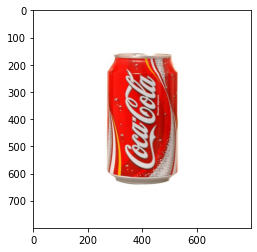

In [11]:
img = plt.imread('./Data/Coca_14.jpg')
plt.imshow(img)

Par défaut, la fonction imread lit les images au format BGR (Bleu-Vert-Rouge). Nous pouvons lire des images dans différents formats en utilisant des drapeaux supplémentaires dans la fonction imread :

* cv2.IMREAD_COLOR : Drapeau par défaut pour le chargement d'une image couleur.
* cv2.IMREAD_GRAYSCALE : charge les images au format en niveaux de gris.



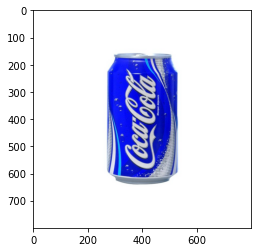

In [12]:
import cv2
image = cv2.imread("./Data/Coca_14.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Nous pouvons également lire des images à partir d'urls et les afficher.

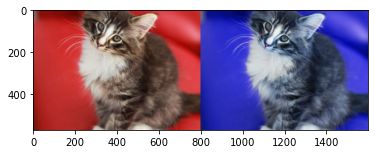

In [14]:
# Create a list to store the urls of the images
url = "https://placekitten.com/800/571"
# Read and display the image
image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image, image_2))
plt.imshow(final_frame)
print('\n')

In [15]:
# Check the image matrix data type
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


Redimensionnement des images : le redimensionnement est très utile pour former des modèles d'apprentissage profond. Cependant, différentes fonctions d'interpolation et de sous-échantillonnage relèvent également d'OpenCV avec les paramètres suivants
*   INTER_LINEAR
*   INTER_AREA
*   INTER_CUBIC
*   INTER_LANCZOS4

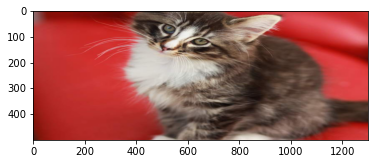

In [16]:
import cv2
img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
img =cv2.resize(img,(1300,500))
plt.imshow(img)

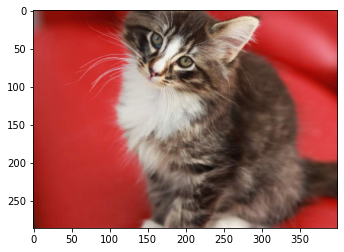

In [17]:
# Resize avec ratio:

width_ratio = 0.5
height_ratio = 0.5

img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img, (0,0), img, width_ratio,height_ratio)
plt.imshow(img2)

Image Rotation/Flipping: 

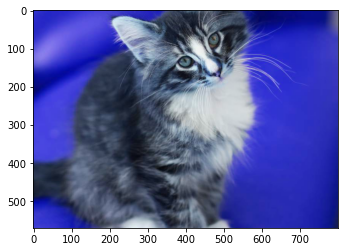

In [18]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Along central x axis
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

# Along central y axis
new_img = cv2.flip(img_rgb,1)
plt.imshow(new_img)

**Comment OpenCV gère les plans de couleur ?**
D’abord, il faut lire et afficher l'image comme référence

Puisque l'image chargée est en couleur, sa taille est de 3 chiffres : # height (# of rows), width (# de cols) et enfin des plans de couleur (BGR)


In [19]:
height, width, channels = img.shape[:3]
print ('Image height: {}, Width: {}, # of channels: {}'.format(height, width, channels))

Image height: 571, Width: 800, # of channels: 3


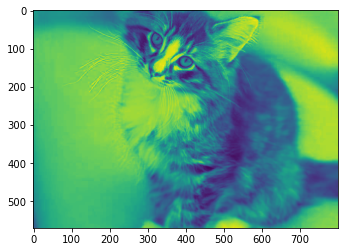

In [20]:
# Rappelez-vous que openCV lit comme mode BGR, donc le canal 0 est bleu, le canal 1 est vert et le canal 2 est rouge

blues = img[:, :, 0]
greens = img[:, :, 1]
reds = img[:, :, 2]

# Afficher les plans d’image bleu, vert et rouge pour l’image de fruit en utilisant imshow()
plt.imshow(blues)

In [21]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

img = cv2.imread("./Data/fruits.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Tracer les valeurs pour chaque plan de couleur sur une ligne spécifique :
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

<Figure size 720x288 with 0 Axes>

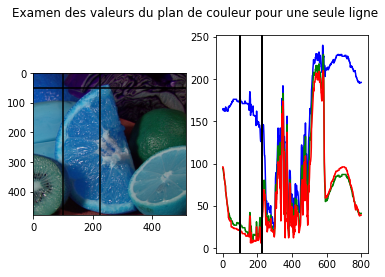

In [22]:
# original image
ax0 = plt.subplot(gs[0])
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # need to convert BGR to RGB
ax0.axhline(50, color='black') # show the row being used
ax0.axvline(100, color='k'), ax0.axvline(225, color='k') # ref lines
# image slice
ax1 = plt.subplot(gs[1])
ax1.plot(blues[49, :], color='blue')
ax1.plot(greens[49, :], color='green')
ax1.plot(reds[49, :], color='red')
ax1.axvline(100, color='k', linewidth=2), ax1.axvline(225, color='k', linewidth=2)
plt.suptitle('Examen des valeurs du plan de couleur pour une seule ligne')
plt.show()

**Conversion des couleurs**:
Pour la conversion des couleurs, nous utilisons la fonction cv2.cvtColor (image_entrée, flag) où l'indicateur détermine le type de conversion. Pour la conversion BGR  Gray, nous utilisons les indicateurs cv2.COLOR_BGR2GRAY. De même pour BGRHSV, nous utilisons le drapeau cv2.COLOR_BGR2HSV. 
Charger une image couleur, appliquer ces fonctions de conversion entre les différents espaces de couleur et afficher leur composant !

<class 'numpy.ndarray'>


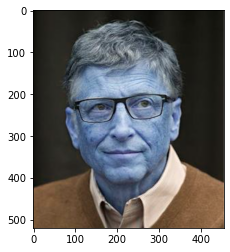

In [27]:
# Charger une image couleur, appliquer ces fonctions de conversion entre les différents espaces de couleur et afficher leur composant !

img_color = cv2.imread('Data/455x520.png')
print(type(img_color))
height,width = img_color.shape[:2]

img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)


lower_blue = (120-10, 30, 30)
upper_blue = (120+10, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_blue, upper_blue)


img_result = cv2.bitwise_and(img_color, img_color, mask = img_mask)


plt.imshow(img_color)


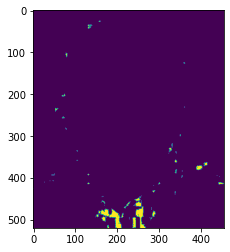

In [28]:
plt.imshow(img_mask)


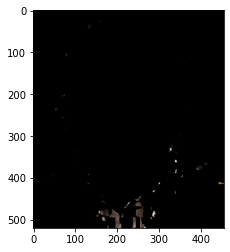

In [29]:
plt.imshow(img_result)

Afin de mieux comprendre l’utilité de conversion entre espaces, essayons d’implémenter un système de tracking d’objet coloré à partir d’un floux vidéo. D’abord, pour récupérer le flux vidéo, image par image, vous pouvez utiliser la fonction cv2.VideoCapture(0), qui exige l’installation du package opencv-contrib-python
Cet exemple applique un seuillage dans l’espace HSV. Testez-le et essayer de l’appliquer dans l’espace RGB.

In [30]:
# ce code est à tester sur machine et non sur colab !!!
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

KeyboardInterrupt: 

**Comment appliquer des opérateurs arithmétiques afin d’additionner, de soustraire et de fusionner des images dans OpenCV ?**

Vous pouvez ajouter deux images par la fonction cv.add () d’OpenCV ou simplement par opératio res = img1 + img2 de numpy. Les deux images doivent avoir la même profondeur et le même type, ou la seconde image peut simplement être une valeur scalaire. 
Attention : Il y a une différence entre l’addition d'OpenCV et l’addition de Numpy. L’addition d'OpenCV est une opération saturée alors que l’addition de Numpy est une opération modulo. Par exemple, considérons l'exemple ci-dessous:

In [31]:
x = np.uint8([250])
y = np.uint8([10])
print ('Open CV Addition {}'.format(cv2.add(x, y))) # 250+10 = 260 => 255
print ('')
print ('Numpy Addition {}\n'.format(x+y)) # 250+10 = 260 % 256 = 4

Open CV Addition [[255]]

Numpy Addition [4]



Si nous voulons appliquer la fonction cv2.add(), les images doivent avoir la même taille pour une addition par paire ou le second argument peut simplement être une valeur scalaire pour l'ajout d'éléments :

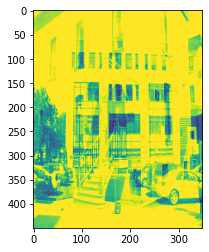

In [40]:
# read in two image files
bicycle = cv2.imread('Data/building.jpg', 0)
dolphin = cv2.imread('Data/building2.jpg', 0)
w, h = bicycle.shape
bicycle = cv2.resize(bicycle, dsize=(350, 450), interpolation=cv2.INTER_CUBIC)
dolphin = cv2.resize(dolphin, dsize=(350, 450), interpolation=cv2.INTER_CUBIC)
if bicycle.shape[:2] == dolphin.shape[:2]:
  sum_img = cv2.add(bicycle, dolphin) # add images together
  plt.imshow(sum_img)



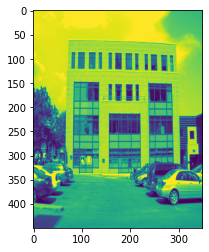

In [41]:
scaled_img = cv2.add(bicycle, 50)    
plt.imshow(scaled_img)

Il y a aussi la fonction de soustraction absolue cv2.absdiff. Il faut l’utiliser d’en sorte que nous n'avons pas d'intensités négatives, l'ordre n'a pas d'importance avec absdiff :

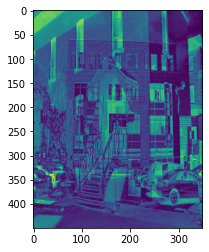

In [42]:
if bicycle.shape[:2] == dolphin.shape[:2]:
    diff = cv2.absdiff(bicycle, dolphin)
    plt.imshow(diff)

Nous pouvons aussi trouver l’image moyenne entre deux images. Ici, nous montrons deux façons de le faire et leurs images résultantes :

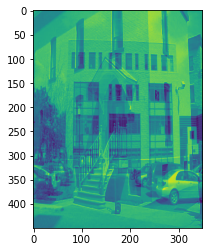

In [43]:
if bicycle.shape[:2] == dolphin.shape[:2]:
    average_img = bicycle / 2 + dolphin / 2
    alt_average_img = cv2.add(bicycle, dolphin) / 2
    plt.imshow(average_img)

**Fusion d'images** (ou Image Blending): nous pouvons ajouter ou fusionner deux images à l'aide de la méthode cv2.addWeighted(). La fonction addWeighted() renvoie un tableau numpy contenant les valeurs de pixel de l'image résultante.
Le mélange n'est rien d'autre que l'addition de deux matrices d'images. Donc, si nous voulons ajouter deux images, cela signifie très simple que nous devons ajouter deux matrices respectives. Pour agréger deux matrices, la taille des deux images doit être la même.

cv2.addWeighted s’agit d’une addition d’image, mais des poids différents sont attribués aux images pour donner une impression de mélange ou de transparence. Les images sont ajoutées selon l'équation ci-dessous :

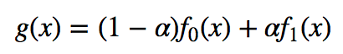

Ici, j'ai pris deux images pour les mélanger. La première image se voit attribuer un poids de 0,7 et la deuxième image, 0,3. cv.addWeighted () s'applique à l'équation suivante sur l'image. 

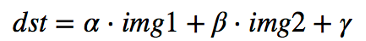

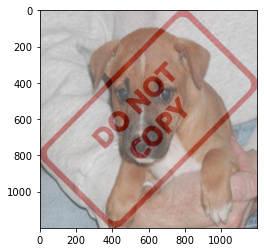

In [44]:
# Two images
img1 = cv2.imread('./Data/dog.jpg')
img2 = cv2.imread('./Data/watermark_no_copy.png')
# Check image shape should be same
img1.shape
img2.shape
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
##Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)
plt.imshow(blended)

**Création d'un ROI de région d'intérêt:** l'idée de base derrière le ROI est qu'il mappe la position de chaque objet dans l'image à un nouvel emplacement dans l'image de sortie finale. Le retour sur investissement ajoute également l'invariance de décalage au modèle. En changeant la position de l'objet, le modèle peut mieux apprendre les modèles, ce qui conduit à la généralisation du modèle. Le retour sur investissement peut être largement utilisé dans l'étape de prétraitement de l'image.


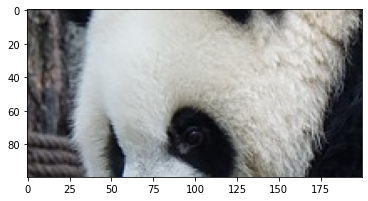

In [45]:
img1 = cv2.imread('./Data/panda.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
img1.shape
x_offset=150
y_offset=150
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:250,x_offset:350] # BOTTOM RIGHT CORNER
plt.imshow(roi)

**Seuillage simple d’image:**
Le seuillage est une technique de segmentation utilisée pour séparer un objet des images, nous utilisons une valeur globale comme seuil. Si la valeur du pixel est inférieure au seuil, elle est définie sur 0, sinon elle est définie sur une valeur maximale

Opencv offre une fonction cv2.threshold qui permet d'effectuer le seuillage. Le premier argument de cette fonction est l'image source, qui doit être une image en niveaux de gris. Le deuxième argument est la valeur de seuil utilisée pour classer les valeurs de pixels. Le troisième argument est le maxVal qui représente la valeur à donner si la valeur du pixel est supérieure à (parfois inférieure à) la valeur du seuil. OpenCV fournit différents styles de seuillage et est décidé par le quatrième paramètre de la fonction. Différents types de seuillage simple sont:
*	cv.THRESH_BINARY ==> toute valeur de pixel inférieure à la valeur de seuil est affectée à 0. tandis que tout pixel au-dessus de la valeur de seuil est assigné à 255 & cv.THRESH_BINARY_INV est l'inverse de cv.THRESH_BINARY

* cv.THRESH_TRUNC ==> toute valeur de pixel inférieure au seuil restera inchangée, mais toute valeur supérieure au seuil obtiendra la valeur de la valeur seuil

* cv.THRESH_TOZERO ==>toute valeur de pixel inférieure au seuil sera mise à zéro, mais toute valeur supérieure au seuil restera inchangé & cv.THRESH_TOZERO_INV est l'inverse

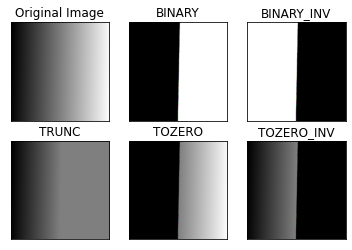

In [ ]:
img = cv.imread('./Data/gradient.png', 1)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


plt.show()

**Seuillage adaptatif**: le seuil est calculé pour des régions spécifiques, pas globalement pour tous les pixels, l'algorithme détermine le seuil pour un pixel en fonction d'une petite région autour de lui.
cv.adaptiveThreshold(img, valeur maximale attribuée aux pixels dont la condition sera satisfaite, méthode adaptative, # type de seuil, taille de bloc ==> taille de la zone de voisinage, valeur C (la valeur const sera soustraite de # méthode adaptative)

Méthode_adaptative ==> 1- cv.ADAPTIVE_THRESH_MEAN_C, 2- cv.ADAPTIVE_THRESH_GAUSSIAN_C
* cv.ADAPTIVE_THRESH_MEAN_C : La valeur seuil est la moyenne de la zone de voisinage moins la constante C.
* cv.ADAPTIVE_THRESH_GAUSSIAN_C : la valeur de seuil est une somme pondérée gaussienne des valeurs de voisinage moins la constante C.

* Binarisation d'Otsu ==> La méthode d'Otsu évite d'avoir à choisir une valeur et la détermine automatiquement.

* BlockSize : Taille d'un voisinage de pixel utilisé pour calculer une valeur de seuil pour le pixel : 3, 5, 7, etc. # Le blockSize détermine la taille de la zone de voisinage et C est une constante qui est soustraite de la moyenne ou de la somme pondérée des pixels du voisinage.

127.0 , 0.0


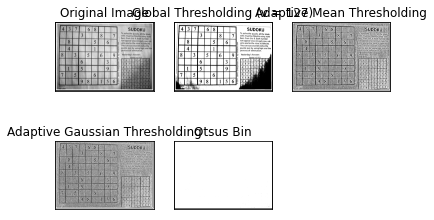

In [46]:
img = cv.imread('./Data/sudoku 001.jpg', cv.IMREAD_GRAYSCALE)
ret1, th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
ret2, th4 = cv.threshold(img,0,255,cv.THRESH_BINARY, cv.THRESH_OTSU)


titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding',
          'Adaptive Gaussian Thresholding', 'Otsus Bin']
images = [img, th1, th2, th3,th4]
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

print(ret1,',' ,ret2)

plt.show()

**Détection de contour:**
Les contours peuvent être expliqués simplement comme une courbe joignant tous les points continus (le long de la frontière), ayant la même couleur ou intensité. Les contours sont un outil utile pour l'analyse de forme et la détection et la reconnaissance d'objets.

Dans OpenCV, trouver des contours revient à trouver un objet blanc sur fond noir. Ainsi, l'objet à trouver doit être blanc et l'arrière-plan doit être noir.
La fonction cv.findContours() prend les arguments: la première est l'image source, la seconde est le mode de récupération des contours, la troisième est la méthode d'approximation des contours. Et il produit les contours et la hiérarchie.

*Mode de récupération*:
* RETR_EXTERNAL : récupère uniquement les contours extérieurs extrêmes
* RETR_LIST : récupère tous les contours sans établir de relations hiérarchiques.
* RETR_CCOMP : récupère tous les contours et les organise dans une hiérarchie à deux niveaux. Au niveau supérieur, il existe des limites externes des composants. Au deuxième niveau, il y a les limites des trous. S'il y a un autre contour à l'intérieur d'un trou d'un composant connecté, il est toujours placé au niveau supérieur.
* RETR_TREE : récupère tous les contours et reconstitue une hiérarchie complète de contours imbriqués.


*Méthode d'approximation*:
*CHAIN_APPROX_NONE : stocke absolument tous les points du contour. C'est-à-dire, tous les 2 points suivants (x1,y1) et (x2,y2) du contour sera soit des voisins horizontaux, verticaux ou diagonaux
*2-CHAIN_APPROX_SIMPLE : comprime les segments horizontaux, verticaux et diagonaux et ne laisse que leurs extrémités. par exemple, un contour rectangulaire vers le haut est codé avec 4 points.
*3-CHAIN_APPROX_TC89_L1, 4-CHAIN_APPROX_TC89_KCOS

cv.drawContours( Son premier argument est l'image source, le deuxième argument est les contours qui doivent être passés sous forme de liste Python, le troisième argument est l'index des contours (utile pour dessiner un contour individuel. Pour dessiner tous les contours, passez -1) et les arguments restants sont la couleur, l'épaisseur)

10


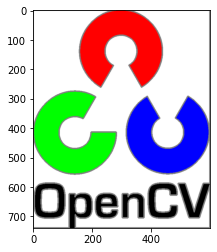

In [47]:
img = cv.imread('Data/opencv-logo.png')

imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Simple thresholding
ret,thresh = cv.threshold(imgGray,200,255,cv.THRESH_BINARY)

# Contours is a python list of all contours in the image, each contour is a numpy array of (x,y) coordinates of boundary points of the object
# Hierarchy is optional output vector containing information about the image topology. It has as many elements as the number of contours.

contours, hierarchy = cv.findContours(thresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
print(len(contours))

image = cv.drawContours(img, contours, -1, (127,127,127), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



**Hough Transform**: est une technique populaire pour détecter n'importe quelle forme (selle peut être représentée sous une forme mathématique). Elle peut détecter la forme même si elle est légèrement cassée ou déformée.
L'algorithme de transformation de Hough:


1.   Détection des bords (Canny, Seuil, etc.)
2.   Cartographie des points de bord à l'espace hough et stockage dans un accumulateur
3.   Interprétation de l'accumulateur pour produire des lignes de longueur infinie en utilisant le seuillage
4.   Conversion de droites infinies en droites finies

cv.HoughLines(image, précision rho, précision thêta, seuil, srn, stn, min_theta, max_theta) ==> Trouve des lignes dans une image binaire à l'aide de la transformée de Hough standard.

cv.HoughLines renvoie simplement un tableau de valeurs (rho, theta). ρ(rho) est mesuré en pixels et θ(theta) est mesuré en radians
* Image : image source binaire monocanal 8 bits (résultat détecté de bord).
* Rho : résolution distance de l'accumulateur en pixels.
* Thêta : résolution angulaire de l'accumulateur en radians.
* Threshold : Paramètre de seuil de l'accumulateur. Seules les lignes qui obtiennent suffisamment de **votes** ( > threshold ) sont renvoyées.
Le nombre de votes dépend du nombre de points sur la ligne. Il représente donc la longueur minimale de ligne qui doit être détectée.

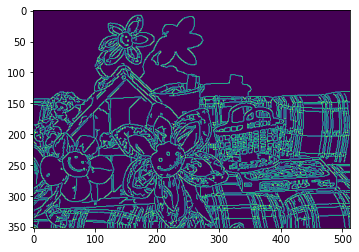

In [48]:
img = cv.imread('Data/flowers-right.png')
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img, 50, 150, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

# ρ = xCos(θ) + ySin(θ)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    # Origin or top-left corner
    x0 = a*rho
    y0 = b*rho
    # Standard formulas for achieving edge points
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

plt.imshow(edges)


**Les transformations morphologiques**: sont effectuées sur des images binaires, cv.dilate(img, kernel ==> defined shape,

La fonction a besoin de deux entrées, l'une est notre image d'origine, la seconde est appelée élément structurant ou noyau qui décide de la nature de l'opération.

Deux opérateurs morphologiques de base sont l'**érosion** et la **dilatation**.

* *Erosion:*
Elle érode les limites de l'objet de premier plan, un pixel dans l'image d'origine (soit 1 soit 0) ne sera considéré comme 1 que si tous les pixels sous le noyau sont 1, sinon il est érodé (mis à zéro). tous les pixels proches de la limite seront supprimés en fonction de la taille du noyau. Ainsi, l'épaisseur ou la taille de l'objet de premier plan diminue ou simplement la région blanche diminue dans l'image

* *Dilatation*
C'est juste l'opposé de l'érosion. Ici, un élément pixel vaut '1' si au moins un pixel sous le noyau est '1'. Ainsi, la zone blanche de l'image ou la taille de l'objet de premier plan augmente. Normalement, dans des cas comme l'élimination du bruit, l'érosion est suivie d'une dilatation. Parce que l'érosion enlève bruits blancs, mais cela rétrécit également notre objet. Alors on le dilate

* *Ouverture:*
L'ouverture n'est qu'un autre nom de l'érosion suivie de la dilatation. Il est utile pour éliminer le bruit

* *Fermeture:* 
La fermeture est l'inverse de l'ouverture, la dilatation suivie de l'érosion. Il est utile pour fermer les petits trous à l'intérieur des objets de premier plan, ou petits points noirs sur l'objet.


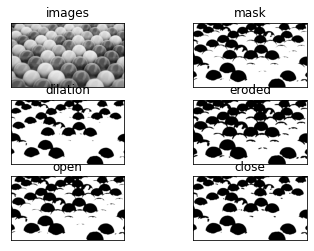

In [49]:
img = cv.imread('Data/1.jpg', cv.IMREAD_GRAYSCALE)

_, th1 = cv.threshold(img,180,255,cv.THRESH_BINARY_INV)
# Generating a white matrix of l=5, w=5 as a kernel
kernel = np.ones((5,5),np.uint8)

ero = cv.erode(th1, kernel, iterations=1)
dil = cv.dilate(th1, kernel, iterations=1)
ope = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel)
clo = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)

titles = ['images', 'mask', 'dilation', 'eroded', 'open', 'close']
images = [img, th1, dil, ero, ope, clo]
# range(no.) ==> no. represents number of iterations
for i in range(6):
    plt.subplot(3,2,i+1) , plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])



plt.show()

**Exercice 1:**
 
Proposer un système de détection de mouvement dans un contexte de surveillance d’une zone par une caméra vidéo. Le système doit envoyer une alarme lors de la détection d’une personne dans la zone surveillée. Vous pouvez enregistrer votre propre flux vidéo par votre webcam de votre pc à l’aide de ce code :

In [54]:
# sur machine
import cv2
import numpy as np
def save_webcam(outPath, fps, mirror=False):
    # Capturing video from webcam:
    cap = cv2.VideoCapture(0)

    currentFrame = 0

    # Get current width of frame
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # float
    # Get current height of frame
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    out = cv2.VideoWriter(outPath, fourcc, fps, (int(width), int(height)))
    previous_frame = None
    while (cap.isOpened()):
    
        # Capture frame-by-frame
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if ret == True:
            if mirror == True:
                # Mirror the output video frame
                frame = cv2.flip(frame, 1)
            # Saves for video
            out.write(frame)
            if previous_frame is None :
                previous_frame = frame
                #print("flag1")
            else:
                #print("flag2")
                image_difference = cv2.absdiff(previous_frame, frame)
                print(np.mean(image_difference))
                if(np.mean(image_difference)>15):
                    print("Nik ta mere !")
            # Display the resulting frame
            cv2.imshow('frame', frame)


        else:
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):  # if 'q' is pressed then quit
            break

        # To stop duplicate images
        currentFrame += 1

    # When everything done, release the capture
    cap.release()
    out.release()
    cv2.destroyAllWindows()


def main():
    save_webcam('output.avi', 30.0, mirror=True)


if __name__ == '__main__':
    main()
#image = cv2.imread(image_path)

(240, 240, 3)


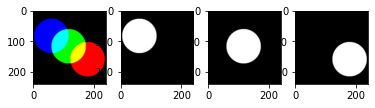

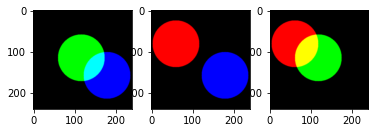

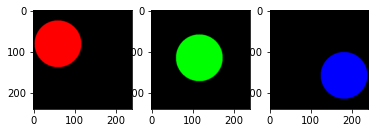

In [108]:
img = cv.imread('Data/bgr.png')
print(img.shape)

channel_1= img[:,:,0]
channel_2= img[:,:,1]
channel_3= img[:,:,2]

blue = img.copy()
blue[:,:,1], blue[:,:,2] = 0,0
green = img.copy()
green[:,:,0], green[:,:,2] = 0,0
red = img.copy()
red[:,:,0], red[:,:,1] = 0,0

channel_list = [img, channel_1, channel_2, channel_3]
color_list = [blue, green, red]

blue2 = img.copy()
blue2[:,:,0] = 0
green2 = img.copy()
green2[:,:,1] = 0
red2 = img.copy()
red2[:,:,2] = 0

color_list2=[blue2, green2, red2]

plt.figure(1)

for i in range(len(channel_list)):
    plt.subplot(1,len(channel_list),i+1),plt.imshow(cv2.cvtColor(channel_list[i], cv2.COLOR_BGR2RGB))

plt.figure(2)

for i in range(len(color_list2)):
    plt.subplot(1,len(color_list2),i+1),plt.imshow(color_list2[i])

plt.figure(3)

for i in range(len(color_list)):
    plt.subplot(1,len(color_list),i+1),plt.imshow(color_list[i])


#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

***Exercice 2***

Dans un espace BGR, une image est traitée comme un résultat additif des trois couleurs de base (bleu, vert et rouge). 

Ecrire un code permettant de lire une image dans l’espace de couleur RGB, faire appel à une procédure pour séparer ses trois canaux et les afficher (voir la figure suivante)

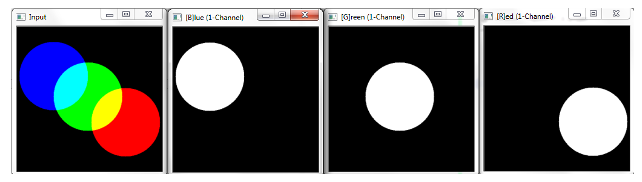

Rappelez-vous qu’une image  couleur est constituée de trois canaux et quand on voit chacun d'eux séparément, la sortie correspond à une image en niveaux de gris.

Modifier votre image afin de permettre la séparation des trois ronds dans l’image d’origine (voir la figure suivante)

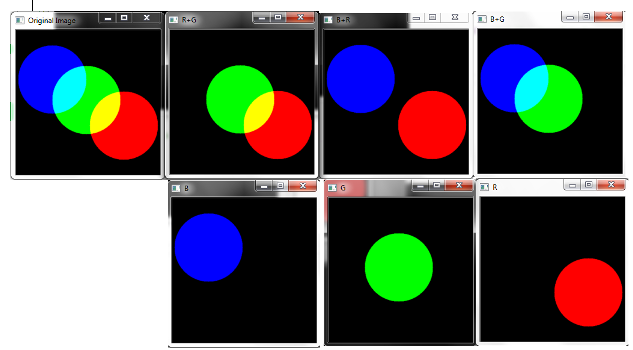

Penser d’abord à les séparer en trois canaux. 
Pour qu’un canal soit visualisé en couleur, il faut le recombiner avec les deux autres canaux mais en gardant une valeur fixe pour ces derniers. 

**Calcul d’histogramme**
L’histogramme est un mode de représentation graphique de la distribution tonale d’une image. L’histogramme associe à chaque niveau – de 0 pour noir à 255 pour blanc – le nombre de pixels correspondant dans l’image considérée. Le niveau 128 représente le gris moyen, qui se situe donc à mi-chemin entre le noir et le blanc. On peut ainsi dire que l’histogramme représente la distribution des valeurs de pixels dans une image.
Imaginez qu'une matrice contient des informations d'une image (intensité est dans les rangs 0-255):

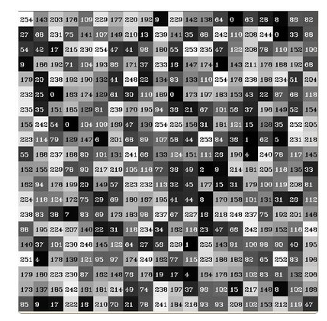

Puisque la plage de la valeur de l'information pour ce cas est de 256 valeurs, nous pouvons segmenter notre rang dans des sous-parties (bins) et calculer le nombre de pixels qui tombent dans le rang de chaque bin_{i}

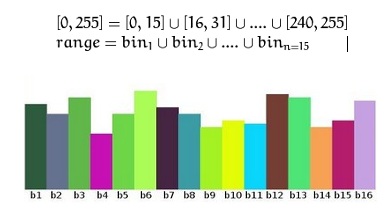

OpenCV et Numpy ont tous deux une fonction intégrée pour calculer l’histogramme d’une image. Avant d'utiliser ces fonctions, nous devons comprendre certaines terminologies liées aux histogrammes.
* BINS: L'histogramme ci-dessus indique le nombre de pixels pour chaque valeur de pixel, c'est-à-dire de 0 à 255. Par exemple, vous avez besoin de 256 valeurs pour représenter l'histogramme ci-dessus. Mais si vous devez trouver le nombre de pixels compris entre 0 et 15, puis 16 à 31, ..., 240 à 255, vus n'aurez besoin que de 16 valeurs pour représenter l'histogramme. Donc, ce que vous faites est simplement de diviser tout l'histogramme en 16 sous-parties et la valeur de chaque sous-partie est la somme de tous les nombres de pixels. Cette sous-partie est appelée «BIN». Dans le premier cas, nombre de cases où 256 (un pour chaque pixel) alors que dans le second cas, il est seulement de 16. BINS est représenté par le terme histSize dans les documents d’Opencv.
* DIMS: C'est le nombre de paramètres pour lesquels nous collectons les données. Dans ce cas, nous collectons des données concernant la valeur d'intensité. 
* RANGE: C'est la plage de valeurs d'intensité que vous voulez mesurer. Normalement, c'est [0,256], soit toutes les valeurs d'intensité.

Opencv offre la fonction cv2.calcHist() pour calculer l’histogramme d’une image.

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
* images : l’image source de type uint8 ou float32. 
* channels : l'indice de canal pour lequel on calcule l'histogramme. Par exemple, si input est une image en niveaux de gris, sa valeur est [0]. Pour l'image couleur, vous pouvez passer [0], [1] ou [2] pour calculer l'histogramme du canal bleu, vert ou rouge respectivement.
* mask : l’image du masque. image du masque. Pour trouver l'histogramme de l'image complète, il est donné comme "None". Mais si vous voulez trouver l'histogramme d'une région particulière de l'image, vous devez créer une image de masque pour cela et lui donner un masque.
* histSize : cela représente notre nombre de BIN

Chargez une image en mode niveaux de gris et trouvez son histogramme complet.
#

img = cv2.imread('home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

hist est un tableau 256x1, chaque valeur correspond au nombre de pixels de cette image avec sa valeur de pixel correspondante.
Numpy vous fournit également une fonction, np.histogram( ) :
#

hist,bins = np.histogram(img.ravel(),256,[0,256])

La différence ici est que les bins auront 257 éléments, car Numpy calcule les bins comme 0-0.99, 1-1.99, 2-2.99 etc. 

La plage finale serait donc 255-255.99. Pour représenter cela, ils ajoutent également 256 à la fin des bacs. 

Mais nous n’en avons pas besoin 256. Jusqu'à 255 est suffisant. Vous pouvez directement calculer l'histogramme et l’afficher :

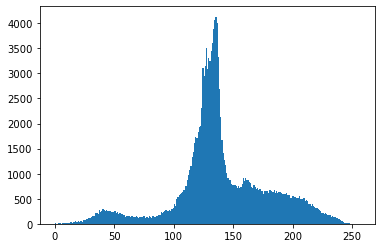

In [55]:
# Vous pouvez directement calculer l'histogramme et l’afficher :
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Data/beach.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

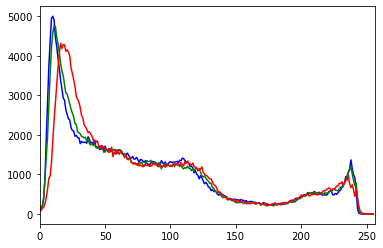

In [56]:
img = cv2.imread('Data/beach.jpg',0)

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


Si vous voulez trouver des histogrammes de certaines régions d'une image, il suffit de créer une image de masque avec une couleur blanche sur la région que vous souhaitez trouver en histogramme et en noir sinon. Puis passez ceci comme masque.

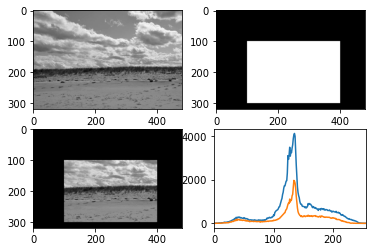

In [57]:
img = cv2.imread('Data/beach.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

Pour comparer deux histogrammes, il faut d'abord choisir une métrique pour exprimer à quel point les deux histogrammes correspondance. La fonction compareHist permet d’effectuer cette comparaison, et dispose également de 4 mesures différentes pour calculer l'appariement.

cv.CompareHist(hist1, hist2, method)

method : cv2.HISTCMP_CORREL, cv2.HISTCMP_CHISQR, cv2.HISTCMP_INTERSECT ou cv2.HISTCMP_BHATTACHARYYA

<module 'matplotlib.pyplot' from 'C:\\Users\\PC-ARNAUD\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

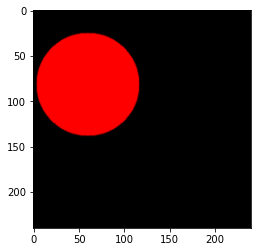

In [115]:
img = cv.imread('Data/bgr.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
R = img.copy()
R[:,:,1], R[:,:,2] = 0, 0
plt.imshow(R)

***Exercice 3:***

Proposer une méthode qui permet de comparer une image requête à un ensemble d’image de référence afin de trouver la plus proche. Prenez comme image requête :  "data/waves.jpg", et comme images de référence l’ensemble d’images :  beach.jpg, dog.jpg, polar.jpg, bear.jpg, lake.jpg et moose.jpg

***Exercice 4:*** 

Comment l’histogramme peut contribuer à la recherche d’objet dans une image!
Appliquer le calcul d’histogramme pour des régions d’intérêt (ou entre une région d’intérêt requête et des régions d’intérêt dans l’image), comparer leurs histogrammes. N’oublier pas de normaliser vos histogrammes avec cv2.normalize().

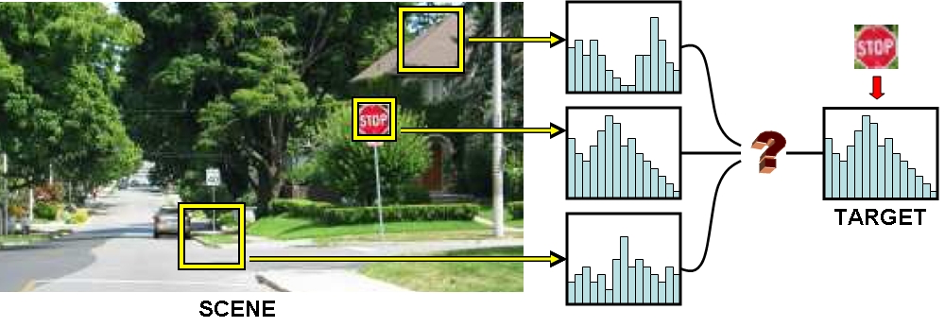